$$h_{\theta}(x^{i}) = \theta_{0} x_{0}^i+\theta_{1} x_{1}^i+\theta_{2} x_{2}^i+\theta_{j} x_{j}^i \tag{1}$$

$$J(\theta) = \frac{1}{2m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{i})-y^{i})^2 \tag{2}$$

$$J(\theta) = \frac{1}{2m}\sum\limits_{i=1}^{m}((\theta_{0} x_{0}^i+\theta_{1} x_{1}^i+\theta_{2} x_{2}^i+\theta_{j} x_{j}^i)-y^{i})^2 \tag{3}$$

$$\frac{\partial J(\theta)}{\partial \theta_{j}} = \frac{1}{m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{i})-y^{i})x_{j}^i \tag{4}$$

$$\frac{\partial J(\theta)}{\partial \theta_{j}} = \frac{1}{m}\sum\limits_{i=1}^{m}((\theta_{0} x_{0}^i+\theta_{1} x_{1}^i+\theta_{2} x_{2}^i+\theta_{j} x_{j}^i)-y^{i})x_{j}^i \tag{5}$$

$$\theta_{j} = \theta_{j} - \alpha \frac{1}{m}\sum\limits_{i=1}^{m}((\theta_{0} x_{0}^i+\theta_{1} x_{1}^i+\theta_{2} x_{2}^i+\theta_{j} x_{j}^i)-y^{i})x_{j}^i \tag{6}$$

$$J(\theta) = \frac{1}{2m}(x \theta - y)^T(x \theta - y) \tag{7}$$

$$\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m}x^T(x \theta - y) \tag{8}$$

In [44]:
import numpy as np
import random
random.seed(63)

import matplotlib.pyplot as plt

In [45]:
#generate random data with seed for reproducibility
np.random.seed(63)
a = np.random.randn(1000,10)

In [46]:
np.random.seed(63)
b = np.random.randn(1000,1)

In [47]:
class lr(object):
    """
    Class constructor.
    """
    
    def __init__(self,x0:np.ndarray, y0:np.ndarray,lr:float=0.1,n_iters:int=100):
        """
        Constructor method.
        """
        self.x0 = x0
        self.y0 = y0
        assert(type(x0)==np.ndarray and type(y0)==np.ndarray) 
        
        
        self.lr = lr
        assert type(lr)==float
        
        
        self.n_iters = n_iters
        self.m, self.n = np.shape(self.x0)[0], np.shape(self.x0)[1]
        
        # 1D array of size n_features
        #initialise theta
        #column vector of of shape(10,1)
        #np.ones creates a tuple (10,)
        self.th = np.ones(self.n).reshape(-1,1)
        
        
    
    
    def cost_not_vectorised(self, theta):
        
        
        #this indicates that cost will be a float
        #calculate cost at each row or sample and then sum
        c = 0
        for i in range(self.m):    
            
            #y_hat prediction for each row with all estimated parameters
            #at each row, iterate over all columns/parameters stored in theta
            y_hat = 0
            for j in range(self.n):
                #element-wise multiplication
                #not matrix multiplication
                
                
                #self.x0 of shape(1000,10) and theta of shape (10,1)
                #equation 1
                y_hat += theta[j]*self.x0[i][j]
            
            #np.power because of neg distance and punishing large outliers
            #cost for row i, substract actual from prediction
            #equation 2 (short version) or equation 3 (long version)
            c_i = (y_hat - self.y0[i])**2
            c += c_i
            
        cost = (1/(2*self.m))*float(c)
        
        return cost
    
    
    
    
    def gradient_descent_not_vectorised(self):
        
        cost_list = []
        for _ in range(self.n_iters):
            
            
            #here starts equation 4 (short version) or equation 5 (long version)
            #first iterate over num of features
            #calc y_hat - iterate over samples and features as in previous step
            #calculate derivative at that row i (sample i)
            #sum derivatives from all rows for a single theta j
            #repeat over all j
            
            derivatives_list = []
            for k in range(self.n):
                
                
                #sum derivatives from all rows
                d_j = 0
                for i in range(self.m):
                    
                    #estimate
                    y_hat = 0
                    for j in range(self.n):
                        y_hat += self.th[j]*self.x0[i][j]
                    
                    #derivative for each row
                    #cannot be indexed by j because out of that for loop at this step
                    #index by k because derivative for k parameter 
                    
                    #derivative of theta j at row i
                    d_i = (y_hat - self.y0[i])*self.x0[i][k]
                    
                    #sum all rows and store as d_j, derivative of theta j (sum all rows i)
                    d_j += d_i 
                
                
                
                #append derivative for each column (of each parameter) to a list
                derivatives = (1/self.m)*d_j
                derivatives_list.append(derivatives)
            
            
            
            #update params stored as self.th according to lr rate
            #both self.th and derivatives_list are column vectors of shape (10,1)
            #indexed by z, hence result is a column vector of original shape
            
            derivatives_list = np.array(derivatives_list).reshape(-1,1)
            for z in range(len(self.th)):
                
                #equation 6
                self.th[z] = self.th[z] - self.lr*derivatives_list[z]
            
            
            
            
            #pass updated parameters to the cost function
            cost = self.cost_not_vectorised(self.th)
            
            #append to list and start iterate again
            cost_list.append(cost)
            plt.plot(cost_list)
        
        return cost_list
    
    
    
    
    
    
    
    def cost_vectorised(self, theta):
        
        
        #b refers to x@theta - y in equation 7 for conciseness
        
        
        
        #self.x0 of shape (1000,10) and self.th of shape (10,1)
        #the matrix multiplication result of shape (1000,1)
        if np.shape(self.x0)[1] == np.shape(theta)[0]:
        
            a = self.x0@theta
            a = a.reshape(-1,1) #shape (1000,1), not necessary
            
            
            #vector shape (1000,1) necessary for column vector substraction in vectorised form
            if np.shape(a) == (np.size(self.x0,0),np.size(theta,1)):
        
                #all three column vectors of shape (1000,1)
                b = a - self.y0
                
                if np.shape(b.T)[1] == np.shape(b)[0]:
                
                    #b.T of shape (1,1000) and b of shape (1000,1)
                    #matrix multiplication result of shape (1,1), which is a scalar
                    
                    
                    #equation 7
                    c = b.T@b
                    cost = (1/(2*self.m))*float(c)
                
                
                else:
                    #if this not true, matrix multiplication cannot be calculated
                    print(f"{np.shape(b.T)[1]} must be equal to {np.shape(b)[0]}")
                
                
        
            else:
                #check if a = x theta is of correct shape
                print(f"vector a must be of size ({np.size(self.x0,0)},{np.size(theta,1)})")
        
        
        else:
            #if this not true, matrix multiplication cannot be calculated
            print(f"{np.shape(self.x0)[1]} not equal to {np.shape(theta)[0]}")
        
        
        
        
        
        return cost
    
    
    
    
    
    
    
    def gradient_descent_vectorised(self):
        
        cost_list1 = []
        
        for z in range(self.n_iters):
            
            
            
            #shape(1000,1)
            a = np.reshape(self.x0@self.th - self.y0,(-1,1))
            
            #shape (10,1000)
            b = self.x0.T
            
            #matrix multiplication result of shape (10,1) which is exactly shape of self.th
            #c is the derivative of the cost function w.r.t. j, equation 8
            c = b@a
            c = (1/self.m)*c
            
            #old parameter value minus (learning rate x derivative) 
            #update params according to learning rate and derivative calculated above
            self.th = self.th - self.lr*c
            
            
            cost_i = self.cost_vectorised(self.th)
            cost_list1.append(cost_i)
    
    
        plt.plot(cost_list1)
    
        return cost_list1

In [48]:
a = lr(a,b,0.1,100)

In [49]:
#a.cost_not_vectorised(a.th)

In [50]:
#a.gradient_descent_not_vectorised()

In [51]:
a.cost_vectorised(a.th)

5.601499865164053

[4.596763759784506,
 3.7895597623843043,
 3.1409638756193927,
 2.619738432013688,
 2.2008112480835305,
 1.8640562678598154,
 1.593315820551739,
 1.3756165292283546,
 1.2005404454978803,
 1.0597206231897067,
 0.9464364611568954,
 0.8552890448895116,
 0.7819406414163288,
 0.7229056462450937,
 0.6753828003368157,
 0.637120513786655,
 0.6063087506268192,
 0.5814922257440627,
 0.5615007041869278,
 0.545393026272898,
 0.5324121498553817,
 0.5219490366838845,
 0.5135136392691134,
 0.5067115891026307,
 0.501225463347062,
 0.49679972872476874,
 0.4932286391225091,
 0.4903465060784479,
 0.4880198757845813,
 0.4861412381004125,
 0.48462396680467296,
 0.48339824949675686,
 0.4824078130736347,
 0.4816072888572701,
 0.48096009208142015,
 0.4804367150487019,
 0.4800133530290729,
 0.4796707978442512,
 0.4793935468352794,
 0.47916908515726025,
 0.478987307579731,
 0.47884005258929574,
 0.4787207269109734,
 0.4786240028415174,
 0.4785455742267273,
 0.47848195968008717,
 0.478430343864163,
 0.47838844944

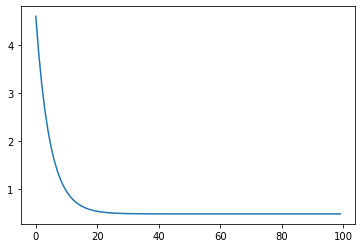

In [52]:
a.gradient_descent_vectorised()